# Projeto 1 - Ciência dos Dados

Nome: Arthur Santos Pansini

Nome: Guilherme Galvão Guedes

Nome: Thiago Colobriali Gomes Godoi

Atenção: Serão permitidos grupos de três pessoas, mas com uma rubrica mais exigente. Grupos deste tamanho precisarão fazer um questionário de avaliação de trabalho em equipe

___
Carregando algumas bibliotecas:

In [64]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from unidecode import unidecode

import re 


def cleanup(text):
    """
        Função de limpeza muito simples que troca alguns sinais básicos por espaços
    """
    #import string
    punctuation = '[´"!-.:?;$'']' # Note que os sinais [] são delimitadores de um conjunto.
    pattern = re.compile(punctuation)
    text_subbed = re.sub(pattern, '', text)
    return text_subbed

In [65]:
print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
c:\Users\guilh\OneDrive\Documentos\GitHub\CDadosP1


Carregando a base de dados com os tweets classificados manualmente:

In [66]:
train = pd.read_excel('dados_treino.xlsx')
train.head(5)

,Mensagem,target treino,Legenda
0,Achei muito merchandising e pouco conteúdo prá...,2.0,1 = critica construtiva ao livro
1,Não é o primeiro livro da Record que oxida em ...,2.0,2 = critica construtiva a edição/pltaforma
2,"Estava com saudades de todos os personagens, m...",1.0,0 = nenhum dos dois
3,"Perdeu toda credibilidade, se realmente fosse ...",1.0,NaN
4,Ainda vou ler.,0.0,NaN


In [67]:
test = pd.read_excel('dados_teste 1.xlsx')
test.head(5)

,Mensagem,target:,Legenda
0,"Não sou de desistir de livro, mas neste não te...",1,1 = critica construtiva ao livro
1,Por ser produto não do meu interesse e recebi...,0,2 = critica construtiva a edição/plataforma
2,"Livro de agradável leitura, bastante esclarece...",0,0 = nenhum dos dois
3,No dia que era para meu livro chegar recebo um...,2,NaN
4,Como pode uma editora aproveitar o sucesso do ...,2,NaN


___
## Classificador automático


Faça aqui uma descrição do seu assunto e o que considerou como relevante ou não relevante na classificação dos tweets (Target).

Nosso projeto considera as seguintes classificações: 1 = Crítica construtiva ao livro, 2 = Crítica construtiva à edição/plataforma e 0 = Nenhum dos dois. Com isso planejamos criar um sistema de identificação de reviews novas, baseando-se em probabilidades encontradas a partir da nossa base de dados.

___
### Montando um Classificador Naive-Bayes

Considerando apenas as mensagens da planilha Treinamento, ensine  seu classificador.

### PROBABILIDADES INICIAIS: 
#### Explicamos o trabalho a partir de dois eventos para ilustra a ideia utilizada e facilitar a compreensão.

Utilizamos os seguintes conceitos inicias:
Se chamarmos a e b de eventos em nosso conjunto universo denominado $\Omega$, temos:
 
$P(a) \rightarrow$ Probabilidade do evento a ocorrer
 
$P(a^c) \rightarrow$ Probabilidade do evento a não ocorrer
 
$P(b) \rightarrow$ Probabilidade do evento b ocorrer
 
$P(b^c) \rightarrow$ Probabilidade do evento b não ocorrer
 
$P(a \cap b) \rightarrow$ Probabilidade do evento a e b ocorrer
 
$P(a|b) \rightarrow$ Probabilidade do evento a ocorrer dado que b ocorreu


Iremos começar calculando a probabilidade de palavras relevantes e irrelevantes aparecerem em nosso conjunto total:

$$ P_{relevante}= \frac{N° Palavras_{relevantes}}{N° Total_{palavras}} $$

$$ P_{irrelevante}= \frac{N° Palavras_{irrelevantes}}{N° Total_{palavras}} $$

De acordo com a teoria complementar de conjuntos:

$$ P_{relevante}+ P_{irrelevante}=1 $$

 Logo:
 
$P(I)  \ ou \ P(R^c)\rightarrow$ Probabilidade de uma frase ser irrelevante.

$P(R) \rightarrow $ Probabilidade de uma frase ser relevante.

$P(comentário) \rightarrow$ Probabilidade de determinada frase ocorrer.

As probabilidade $P(R|frase)$ ou $P(frase|R)$ , podem ser interpretadas como uma probabilidade de "peso" em um novo conjunto total. Ou seja, nos exemplos dados anteriromente temos como novos conjuntos o conjunto frase e conjunto relevância, respectivamente.

Vamos representar da seguinte forma a seguir "Qual a probabilidade de encontrarmos elementos que pertencem ao conjunto a e b no conjunto b"

$$P(a|b) = \frac{P(a \cap b)}{P(b)}$$

Ou seja:

$$P(a|b) = \frac{N° elementos(a \cap b)}{N° elementos(b)}$$

Portanto, vamos usar da mesma ideia, temos:

$$ P(R|𝑓𝑟𝑎𝑠𝑒)= \frac{P(𝑓𝑟𝑎𝑠𝑒 \cap R)}{P(𝑓𝑟𝑎𝑠𝑒)} $$
$$ P(𝑓𝑟𝑎𝑠𝑒|R)= \frac{P(𝑓𝑟𝑎𝑠𝑒 \cap R)}{P(R)} $$

$$ P(I|𝑓𝑟𝑎𝑠𝑒)= \frac{P(𝑓𝑟𝑎𝑠𝑒 \cap I)}{P(𝑓𝑟𝑎𝑠𝑒)} $$
$$ P(𝑓𝑟𝑎𝑠𝑒|I)= \frac{P(𝑓𝑟𝑎𝑠𝑒 \cap I)}{P(I)} $$


Dessa forma, encontramos a probabilidade utilizada por Naive Bayes para classificar um texto como relevante ou não relevante:

$$ P(R|𝑓𝑟𝑎𝑠𝑒)= \frac{P(𝑓𝑟𝑎𝑠𝑒|R) P(R)}{P(𝑓𝑟𝑎𝑠𝑒)} $$
$$ P(I|𝑓𝑟𝑎𝑠𝑒)= \frac{P(𝑓𝑟𝑎𝑠𝑒|I) P(I)}{P(𝑓𝑟𝑎𝑠𝑒)} $$

Essas duas probabilidades acima são utilizadas pelo classificador Naive Bayes para julgar a frase como relevante ou não.

  $\quad \Rightarrow$ Se $P(R|𝑓𝑟𝑎𝑠𝑒) > P(I|𝑓𝑟𝑎𝑠𝑒)$, o comentário será classificado como **Relevante**.

  $\quad \Rightarrow$ Se $P(R|𝑓𝑟𝑎𝑠𝑒) < P(I|𝑓𝑟𝑎𝑠𝑒)$, o comentário será classificado como **Irrelevante**.
  
Portanto, podemos dizer que as probabilidades de que o nosso classificador precisa encontrar são:
"Dada uma fase qual a probabilidade dela ser relevante?" e "Dado uma frase qual a probabilidade dela ser irrelevante?".

 $$𝑃(𝑅|𝑓𝑟𝑎𝑠𝑒)$$
 $$𝑃(𝐼|𝑓𝑟𝑎𝑠𝑒)$$
 
### Após a finalização deste projeto pretendemos construir um algoritimo que consiga tomar a decisão de agrupar uma frase como um assunto relevante ou não relevante de acordo com os três targets escolhidos sobre o tema proposto.

In [68]:
#Função de limpar o texto

lista_train = []

texto_train = train["Mensagem"].apply(cleanup).to_list()

for linha in texto_train:

    linha = unidecode(linha)

    linha = linha.replace(".",'').replace("!",'').replace("?",'').replace(",",'').replace(":",'')

    linha = linha.lower()

    lf = linha.split()

    lista_train.append(lf)

lista_train

[['achei',
  'muito',
  'merchandising',
  'e',
  'pouco',
  'conteudo',
  'pratico',
  'os',
  'conteudos',
  'ficam',
  'em',
  'um',
  'site',
  'e',
  'nao',
  'no',
  'livro',
  'sinto',
  'que',
  'desperdicei',
  'meu',
  'dinheiro',
  'com',
  'o',
  'livro',
  'ja',
  'que',
  'no',
  'site',
  'o',
  'conteudo',
  'e',
  'gratuito',
  'alem',
  'disso',
  'tem',
  'muitas',
  'historias',
  'pessoais',
  'e',
  'relatos',
  'sobre',
  'como',
  'o',
  'milagre',
  'e',
  'incrivel',
  'e',
  'pouco',
  'sobre',
  'o',
  'milagre'],
 ['nao',
  'e',
  'o',
  'primeiro',
  'livro',
  'da',
  'record',
  'que',
  'oxida',
  'em',
  'menos',
  'de',
  'tres',
  'meses',
  'e',
  'olha',
  'que',
  'meus',
  'livros',
  'sao',
  'bem',
  'guardados',
  'e',
  'conservados',
  'o',
  'papel',
  'da',
  'maioria',
  'das',
  'edicoes',
  'da',
  'record',
  'e',
  'desse',
  'jeito',
  'fica',
  'amarelo',
  'em',
  'pouco',
  'tempo',
  'e',
  'triste'],
 ['estava',
  'com',
  'saud

In [69]:
palavras_train_0 = []
palavras_train_1 = []
palavras_train_2 = []

palavras_train_0_limpo = []
palavras_train_1_limpo = []
palavras_train_2_limpo = []

#--------------------------------------------------------------

linha0 = train['target treino'] == 0
columns = ['Mensagem', 'target treino']
linhas_0 = train[linha0][columns]

linha1 = train['target treino'] == 1
linhas_1 = train[linha1][columns]

linha2 = train['target treino'] == 2
linhas_2 = train[linha2][columns]

#--------------------------------------------------------------

for linha in linhas_0["Mensagem"]:
    linha = linha.split()
    for palavra in linha:
        palavras_train_0.append(linha)

for sublist in palavras_train_0:

    for item in sublist:

        palavras_train_0_limpo.append(item)

#--------------------------------------------------------------

palavras_train_1 = []

for linha in linhas_1["Mensagem"]:
    linha = linha.split()
    for palavra in linha:
        palavras_train_1.append(linha)

for sublist in palavras_train_1:

    for item in sublist:

        palavras_train_1_limpo.append(item)

#--------------------------------------------------------------

palavras_train_2 = []

for linha in linhas_2["Mensagem"]:
    linha = linha.split()
    for palavra in linha:
        palavras_train_2.append(linha)

for sublist in palavras_train_2:

    for item in sublist:

        palavras_train_2_limpo.append(item)

#--------------------------------------------------------------


___
### Verificando a performance do Classificador

Agora você deve testar o seu classificador com a base de Testes.

In [70]:
lista_test = []

texto_test = test["Mensagem"].apply(cleanup).to_list()

for linha in texto_test:

    linha = unidecode(linha)

    linha = linha.replace(".",'').replace("!",'').replace("?",'').replace(",",'').replace(":",'')

    linha = linha.lower()

    lf = linha.split()

    lista_test.append(lf)

lista_test

[['nao',
  'sou',
  'de',
  'desistir',
  'de',
  'livro',
  'mas',
  'neste',
  'nao',
  'teve',
  'como',
  'o',
  'livro',
  'e',
  'muuuito',
  'ruim',
  'e',
  'cansativo',
  'tem',
  'uma',
  'passagem',
  'em',
  'que',
  'ele',
  'diz',
  'que',
  'na',
  'maioria',
  'dos',
  'livros',
  'so',
  '20',
  'do',
  'conteudo',
  'realmente',
  'importa',
  'so',
  'acho',
  'que',
  'o',
  'autor',
  'realmente',
  'tentou',
  'aplicar',
  'essa',
  'teoria',
  'no',
  'proprio',
  'livro',
  'porque',
  'meu',
  'deus',
  'e',
  'muita',
  'repeticao',
  'e',
  'chatice',
  'em',
  'quase',
  '90',
  'do',
  'livro',
  'mesmo',
  'detestei'],
 ['por',
  'ser',
  'produto',
  'nao',
  'do',
  'meu',
  'interesse',
  'e',
  'recebi',
  'como',
  'bonus',
  'na',
  'compra',
  'de',
  'kindle',
  'poderia',
  'ter',
  'oportunidade',
  'de',
  'escolher',
  'o',
  'livro',
  'da',
  'minha',
  'preferencia'],
 ['livro',
  'de',
  'agradavel',
  'leitura',
  'bastante',
  'esclareced

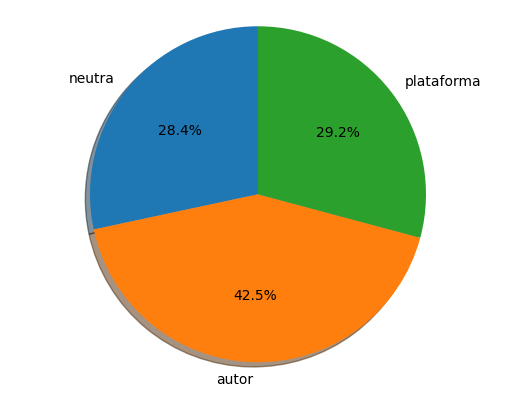

In [71]:
a = train.value_counts("target treino")

labels = ['neutra','autor','plataforma']

sizes = [a[0],a[1],a[2]]

fig1, ax1 = plt.subplots()

ax1.pie(sizes,labels = labels,autopct = '%1.1f%%',shadow = True, startangle = 90)

ax1.axis('equal')

plt.show()

In [72]:
palavras_test_0 = []
palavras_test_1 = []
palavras_test_2 = []

palavras_test_0_limpo = []
palavras_test_1_limpo = []
palavras_test_2_limpo = []

#--------------------------------------------------------------

linha_test0 = test['target:'] == 0
columns_test = ['Mensagem', 'target:']
linhas_0_test = test[linha_test0][columns_test]

for linha in linhas_0_test["Mensagem"]:

    linha = linha.split()

    for palavra in linha:

        palavras_test_0.append(linha)

for sublist in palavras_test_0:

    for item in sublist:

        palavras_test_0_limpo.append(item)

#--------------------------------------------------------------

linha_test1 = test['target:'] == 1
columns_test = ['Mensagem', 'target:']
linhas_1_test = test[linha_test1][columns_test]

for linha in linhas_1_test["Mensagem"]:

    linha = linha.split()

    for palavra in linha:

        palavras_test_1.append(linha)

for sublist in palavras_test_1:

    for item in sublist:

        palavras_test_1_limpo.append(item)

#--------------------------------------------------------------

linha_test2 = test['target:'] == 2
linhas_2_test = test[linha_test2][columns_test]

for linha in linhas_2_test["Mensagem"]:

    linha = linha.split()

    for palavra in linha:

        palavras_test_2.append(linha)

for sublist in palavras_test_2:

    for item in sublist:

        palavras_test_2_limpo.append(item)

palavras_test_2_limpo


['No',
 'dia',
 'que',
 'era',
 'para',
 'meu',
 'livro',
 'chegar',
 'recebo',
 'um',
 'email',
 'da',
 'Amazon',
 'avisando',
 'que',
 'eles',
 'haviam',
 'errado',
 'e',
 'o',
 'livro',
 'demoraria',
 'mais',
 'para',
 'chegar,',
 'quando',
 'ele',
 'chegou,',
 'fui',
 'abrir',
 'e',
 'dois',
 'dos',
 'exemplares',
 'vieram',
 'com',
 'a',
 'capa',
 'amaçada',
 'e',
 'com',
 'sugeria',
 'em',
 'todas',
 'as',
 'capas',
 'das',
 '5',
 'edições(',
 'provável',
 'que',
 'seja',
 'de',
 'cola',
 ')',
 'além',
 'disso',
 'a',
 'caixa',
 'que',
 'vem',
 'para',
 'guardar',
 'os',
 'exemplares',
 'serem',
 'estava',
 'rasgada',
 'e',
 'tive',
 'que',
 'jogar',
 'fora.',
 'No',
 'dia',
 'que',
 'era',
 'para',
 'meu',
 'livro',
 'chegar',
 'recebo',
 'um',
 'email',
 'da',
 'Amazon',
 'avisando',
 'que',
 'eles',
 'haviam',
 'errado',
 'e',
 'o',
 'livro',
 'demoraria',
 'mais',
 'para',
 'chegar,',
 'quando',
 'ele',
 'chegou,',
 'fui',
 'abrir',
 'e',
 'dois',
 'dos',
 'exemplares',
 'vie

In [73]:
palavras_0 = palavras_test_0_limpo + palavras_train_0_limpo
palavras_1 = palavras_test_1_limpo + palavras_train_1_limpo
palavras_2 = palavras_test_2_limpo + palavras_train_2_limpo
palavras_total = palavras_0+palavras_1+palavras_2

#--------------------------------------------------------------

prob_palavras_0 = len(palavras_0)/len(palavras_total)
prob_palavras_1 = len(palavras_1)/len(palavras_total)
prob_palavras_2 = len(palavras_2)/len(palavras_total)

#--------------------------------------------------------------

print(prob_palavras_0)
print(prob_palavras_1)
print(prob_palavras_2)

#--------------------------------------------------------------

serie_total = pd.Series(palavras_total)

tabela_absoluta_total = serie_total.value_counts()

tabela_relativa_total = serie_total.value_counts(True)

#--------------------------------------------------------------

serie_train_0 = pd.Series(palavras_train_0_limpo)

tabela_absoluta_train_0 = serie_train_0.value_counts()

tabela_relativa_train_0 = serie_train_0.value_counts(True)

#--------------------------------------------------------------

serie_train_1 = pd.Series(palavras_train_1_limpo)

tabela_absoluta_train_1 = serie_train_1.value_counts()

tabela_relativa_train_1 = serie_train_1.value_counts(True)

#--------------------------------------------------------------

serie_train_2 = pd.Series(palavras_train_2_limpo)

tabela_absoluta_train_2 = serie_train_2.value_counts()

tabela_relativa_train_2 = serie_train_2.value_counts(True)

0.24100829767474655
0.5389470707332369
0.2200446315920166


# Suavização de Laplace

In [74]:
def laplace(word,freq_abs,serie_total):

    if word not in freq_abs:
    
        frequencia_da_word_categoria=1/(sum(freq_abs)+len(serie_total))
    
    else:
    
        frequencia_da_word_categoria=freq_abs[word]
    
    Prob_word_dada_cat=(1+frequencia_da_word_categoria)/(sum(freq_abs)+len(serie_total))
    
    return Prob_word_dada_cat

In [75]:
def naives(titulos,prob_palavras_0,prob_palavras_1,prob_palavras_2):

    lista_classificadora=[]

    for noticia_titulo in titulos:

        palavras=noticia_titulo.split()

        prob_0_comentario=1
        prob_1_comentario=1
        prob_2_comentario=1

        for palavra in palavras:

            prob_neutras_noticia=prob_palavras_0*laplace(palavra, tabela_absoluta_train_0, serie_total)
            prob_altas_noticia=prob_palavras_1*laplace(palavra, tabela_absoluta_train_1, serie_total)
            prob_baixas_noticia=prob_palavras_2*laplace(palavra, tabela_absoluta_train_2, serie_total)
        
        prob_neutras_noticia=prob_palavras_0*prob_palavras_0
        prob_altas_noticia=prob_palavras_1*prob_palavras_1
        prob_baixas_noticia=prob_palavras_2*prob_palavras_2

        if prob_0_comentario>prob_1_comentario and prob_0_comentario>prob_2_comentario:
    
            lista_classificadora.append(0)
    
        elif prob_1_comentario>prob_0_comentario and prob_1_comentario>prob_2_comentario:
    
            lista_classificadora.append(1)
    
        elif prob_2_comentario>prob_1_comentario and prob_2_comentario>prob_0_comentario:
    
            lista_classificadora.append(2)
    
    return lista_classificadora

In [76]:

tabela_classificadora=naives(palavras_test_0_limpo+palavras_test_1_limpo+palavras_test_2_limpo,prob_palavras_0,prob_palavras_1,prob_palavras_2)
series_lista_classificadora=pd.Series(tabela_classificadora)
tabela_class_rel=series_lista_classificadora.value_counts(True)
tabela_class_abs=series_lista_classificadora.value_counts()

KeyboardInterrupt: 

___
### Concluindo

___
### Qualidade do Classificador a partir de novas separações dos tweets entre Treinamento e Teste

Caso for fazer esse item do Projeto

___
## Aperfeiçoamento:

Trabalhos que conseguirem pelo menos conceito B vão evoluir em conceito dependendo da quantidade de itens avançados:

* IMPLEMENTOU outras limpezas e transformações que não afetem a qualidade da informação contida nos tweets. Ex: stemming, lemmatization, stopwords
* CONSIDEROU mais de duas categorias na variável Target e INCREMENTOU a quantidade de notícias, mantendo pelo menos 250 notícias por categoria (OBRIGATÓRIO PARA TRIOS, sem contar como item avançado)
* Para Target com duas categorias: CRIOU pelo menos quatro categorias intermediárias de relevância baseadas na probabilidade: ex.: muito relevante, relevante, neutro, irrelevante, muito irrelevante
* EXPLICOU porquê não pode usar o próprio classificador para gerar mais amostras de treinamento
* PROPÔS diferentes cenários para Naïve Bayes fora do contexto do projeto (pelo menos dois cenários, exceto aqueles já apresentados em sala pelos professores: por exemplo, filtro de spam)
* SUGERIU e EXPLICOU melhorias reais com indicações concretas de como implementar (indicar como fazer e indicar material de pesquisa)
* FEZ o item Qualidade do Classificador a partir de novas separações das Notícias entre Treinamento e Teste descrito no enunciado do projeto (OBRIGATÓRIO para conceitos A ou A+)

___
## Referências

[Naive Bayes and Text Classification](https://arxiv.org/pdf/1410.5329.pdf)  **Mais completo**

[A practical explanation of a Naive Bayes Classifier](https://monkeylearn.com/blog/practical-explanation-naive-bayes-classifier/) **Mais simples**